In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import re

In [3]:
akreditasi = pd.read_csv('akreditasi_202301040917.csv')
akreditasi

,akred_sp_id,sekolah_id,tahun,sk_penetapan,tanggal_sk,tanggal_akhir_sk,standar_isi,standar_proses,standar_kompetensi_lulusan,standar_ptk,standar_sarpras,standar_pengelolaan,standar_pembiyaan,standar_penilaian,nilai_akhir,akreditasi_id,create_date,last_update,soft_delete,last_sync
0,46768EF3-893F-4BC5-8C8E-B0E4D76A7BAD,F8606299-0641-43BC-A054-EB8A7EEEEB8D,2013,dk 2006545,2013-09-08,2016-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2018-02-06 21:54:58.420,2019-08-11 09:25:03.000,0,2019-08-20 08:13:54.303
1,2493F26F-8394-494D-9609-56255CD627D4,F55D8C8E-A489-4222-A98B-77FF7DE01D1D,2019,159/BAN PAUD DAN PNF/AKR/2019,2019-10-09,2024-10-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2020-03-04 15:09:26.697,2020-03-04 15:09:26.697,0,2020-03-04 15:09:26.697
2,7BC29033-977B-4D5F-875D-B4632EB09E90,F55D8C8E-A489-4222-A98B-77FF7DE01D1D,2019,159/BAN PAUD DAN PNF/AKR/2019,2019-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812.0,2,2022-12-15 14:00:00.000,2022-12-15 14:30:00.000,0,1901-01-01 00:00:00.000
3,7F2059EC-68B5-45EF-9896-FEDBF2DAAA0B,77B58351-DEB1-4C00-8A23-3DB30AEF822C,2018,04.01/BAN-SM-P/TU/XII/2018,2018-12-04,2023-12-04,99.0,98.0,98.0,84.0,93.0,100.0,96.0,95.0,92.0,1,2020-12-15 18:03:47.000,2020-12-15 18:03:47.000,0,2020-12-17 08:00:00.000
4,079545D8-0525-4468-B057-48BD1FC56E99,A4023F2E-D6F9-4043-B762-893329B1BFEE,2021,085/BAN PAUD DAN PNF/AKR/2021,2021-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.0,2,2022-12-15 14:00:00.000,2022-12-15 14:30:00.000,0,1901-01-01 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,A5D369BD-86AA-44FB-922A-CE179A18FE31,8020545C-2EF5-E011-8EF5-C563F1C9257B,2022,1359/BAN-SM/SK/2022,2022-09-30,2027-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,2,2022-12-20 20:26:23.960,2022-12-20 20:26:23.960,0,2022-12-20 20:26:23.960
1083,40E04C6D-B00F-48BD-AD6C-2ADEA1AB527B,2098CD5C-2EF5-E011-9434-913F624D9189,2022,1359/BAN-SM/SK/2022,2022-09-30,2023-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,1,2022-12-20 20:26:22.293,2022-12-20 20:26:22.293,0,2022-12-20 20:26:22.293
1084,889238FB-EE2C-46FD-B86A-8C70C174390F,C071B85C-2EF5-E011-ACAC-D77DF2365649,2022,1359/BAN-SM/SK/2022,2022-09-30,2027-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,2,2022-12-20 20:26:34.213,2022-12-20 20:26:34.213,0,2022-12-20 20:26:34.213
1085,07E95AE9-D81B-446C-ACD7-8D634C77D976,C03CB85C-2EF5-E011-AB38-C1257C4F76C7,2021,1347/BAN-SM/SK/2021,2021-12-08,2026-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,1,2022-12-20 13:43:29.897,2022-12-20 13:43:29.897,0,2022-12-20 13:43:29.897


In [4]:
sekolah = pd.read_csv('sekolah_202301040921.csv')
sekolah

C:\Users\Owen\AppData\Local\Temp\ipykernel_3048\1444114142.py:1: DtypeWarning: Columns (3,21,24,25,30,48,51) have mixed types. Specify dtype option on import or set low_memory=False.
  sekolah = pd.read_csv('sekolah_202301040921.csv')


,sekolah_id,semester_id,nama,nama_nomenklatur,nss,npsn,bentuk_pendidikan_id,bentuk_pendidikan,alamat_jalan,rt,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
0,2040FCD7-2EF5-E011-BC99-17994D4E12BF,20221,SD NEGERI 044845 PAYANDERKET,NaN,101070309009,10201914,5,SD,Desa Payanderket,0.0,...,0.0,Tidak Ada,NaN,C,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-08-10 15:41:01.437,2022-08-10 15:41:01.437,0.0
1,8074A741-31F5-E011-A6C7-03AB5E344F62,20221,SLB NEGERI 1 JAYAPURA,NaN,821256003001,60301021,29,SLB,Jln. Raya Abepura Kotaraja Jayapura,3.0,...,2.0,Telkom Speedy,NaN,NaN,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-30 04:24:19.520,2022-08-09 16:54:40.223,0.0
2,3AA366A0-BD23-4DBA-B457-139D9CA82A50,20221,SD Swasta Islam Terpadu Luqman Padang,NaN,NaN,69964345,5,SD,Jl. Padang - Indarung No. 22 RT 01 RW 04,1.0,...,2.0,Telkom Speedy,NaN,B,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-20 07:38:53.227,2022-07-20 07:38:53.227,0.0
3,804B03C8-2FF5-E011-B980-11C3A5F09C59,20221,SDS AL - MAJIDIYAH BAGAN BATU,NaN,102091005054,10405486,5,SD,Jl. H. Imam Munandar No. 99 Km. 1,4.0,...,2.0,Telkom Speedy,NaN,A,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-28 21:57:10.183,2022-07-28 21:57:10.183,0.0
4,70788AAC-30F5-E011-B2DF-1F9411705C0C,20221,SD GMIST EFRATA TAHUNA,NaN,102170306011,40101520,5,SD,Jln. Gereja Imanuel,0.0,...,NaN,NaN,NaN,NaN,2018-01-24 12:09:39.813,2014-10-15 09:11:00.000,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690028,3ABD1DEC-CA93-4A1B-80A5-1E6C4363E8EB,20221,SMKS SATRIA BHAKTI NGANJUK,NaN,NaN,69775814,15,SMK,Jl Brantas 3B,5.0,...,2.0,Telkom Speedy,NaN,B,2018-01-24 09:47:14.603,2022-12-31 08:29:07.447,0,2022-08-15 19:14:22.723,2022-08-15 19:14:22.723,0.0
690029,ABD6297C-7E1E-41C5-9B41-380D5EEE5211,20221,TK DHARMA WANITA KWADUNGAN,NaN,******,20572388,1,TK,JL. KEN AROK NO 285 - DS. KWADUNGAN,10.0,...,6.0,Indosat IM3,NaN,B,2018-02-06 22:59:03.437,2023-01-01 07:57:20.003,0,2022-08-11 11:18:31.070,2022-08-11 11:18:31.070,0.0
690030,1CBF412E-40BF-4A7B-A053-0C726777B734,20221,TK NU 02 MIFTAHUL HUDA,NaN,******,20575590,1,TK,Jl. Tanjung Arca,2.0,...,91.0,Lainnya (Kabel),NaN,B,2018-02-06 22:59:03.437,2022-12-30 09:19:30.560,0,2022-08-23 23:06:03.000,2022-08-23 23:06:03.000,0.0
690031,B9A0A0E2-2CBA-400F-A9C3-3920B7A40877,20221,KB KASIH IBU KEBON,NaN,****,69851739,2,KB,JALAN RAYA SOLO KM 07,1.0,...,4.0,Telkomsel Flash,NaN,NaN,2018-02-06 22:59:03.437,2022-12-31 08:25:26.330,0,2022-08-13 10:14:25.823,2022-08-13 10:14:25.823,0.0


In [5]:
sekolah_kota_yogyakarta = sekolah[sekolah['kabupaten'].str.contains('Kota Yogyakarta', na=False)]
sekolah_kota_yogyakarta

,sekolah_id,semester_id,nama,nama_nomenklatur,nss,npsn,bentuk_pendidikan_id,bentuk_pendidikan,alamat_jalan,rt,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
215,F8073837-24FC-4694-8D9B-428E13E70D11,20221,SMAS BOPKRI 1,NaN,302046002012,20403227,13,SMA,JL. WARDANI NO. 2 YOGYAKARTA,9.0,...,17.0,Biznet (Serat Optik),NaN,A,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-07-25 11:33:19.540,2022-07-25 11:33:19.540,0.0
799,951A44EF-F18D-4D70-A845-1024AB9CE36A,20221,KB AISYIYAH AL AMNA,NaN,NaN,70003187,2,KB,Bausasran DN 3/819 Yogyakarta,34.0,...,2.0,Telkom Speedy,NaN,NaN,2020-07-31 01:35:41.667,2022-08-31 06:19:30.613,0,2022-08-08 20:32:28.970,2022-08-08 20:32:28.970,0.0
1044,C046CA5C-2EF5-E011-AA9E-636D310EFE63,20221,SD MUHAMMADIYAH SAGAN,NaN,102046002033,20404156,5,SD,Jl Sagan Baru III GK V/1046 Yogyakarta,0.0,...,92.0,Lainnya (Serat Optik),NaN,A,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-08-07 08:37:48.343,2022-08-07 08:37:48.343,0.0
1263,4061CB5C-2EF5-E011-B9C8-3B2979B8BDFE,20221,SD KRISTEN KALAM KUDUS,NaN,102046005023,20404153,5,SD,Jalan Jambon Nomor 41 Yogyakarta,5.0,...,92.0,Lainnya (Serat Optik),NaN,A,2018-01-24 12:09:39.813,2022-11-02 07:45:24.430,0,2022-07-29 04:58:43.807,2022-07-29 04:58:43.807,0.0
1712,004CB75C-2EF5-E011-B965-079108DD0C00,20221,SD NEGERI KOTAGEDE 5,NaN,101046013003,20403436,5,SD,Jl. Kemasan 68,45.0,...,99.0,Lainnya,NaN,A,2018-01-24 12:09:39.813,2022-04-29 09:56:46.627,0,2022-07-27 23:53:38.760,2022-07-27 23:53:38.760,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688077,C53A2C4B-A673-4A08-A7AC-E6FDF3EE02BA,20221,SPS PAUD TUNAS HARAPAN 1,NaN,****,69876609,4,SPS,JATIMULYO TR I/256 RT 002 RW 001,2.0,...,9.0,XL (GSM),NaN,NaN,2018-02-06 22:59:03.437,2022-12-19 18:02:35.577,1,2022-07-23 11:29:29.810,2022-07-23 11:29:29.810,0.0
688080,E0F62747-E7CA-43A8-86F3-232464058EEE,20221,SPS PAUD ASA PERTIWI VI,NaN,****,69876425,4,SPS,NILASARI /CELEBAN,23.0,...,11.0,Smartfren,NaN,NaN,2018-02-06 22:59:03.437,2022-12-19 18:31:51.440,1,2022-07-23 13:57:33.457,2022-07-23 13:57:33.457,0.0
688258,3074B75C-2EF5-E011-AA65-278D406C16BB,20221,SD NEGERI REJOWINANGUN I,NaN,101046013007,20403318,5,SD,Jl. Ki Penjawi No.12 Kotagede,30.0,...,2.0,Telkom Speedy,NaN,A,2018-01-24 12:09:39.813,2022-12-20 14:41:01.080,0,2022-08-04 15:27:35.070,2022-08-04 15:27:35.070,0.0
688797,06D1659E-353C-4F08-A62A-1CD0A2FA7151,20221,KB ISLAM TUNAS MELATI,NaN,****,69849669,2,KB,JL. TIMOHO TEGAL MELATI,23.0,...,6.0,Indosat IM3,NaN,Terakreditasi,2018-02-06 22:59:03.437,2022-12-29 15:16:12.270,0,2022-08-10 14:17:01.053,2022-08-23 05:26:09.470,0.0


In [6]:
sekolah_kota_yogyakarta['akreditasi']

215                   A
799                 NaN
1044                  A
1263                  A
1712                  A
              ...      
688077              NaN
688080              NaN
688258                A
688797    Terakreditasi
689128                A
Name: akreditasi, Length: 1577, dtype: object

In [7]:
#ptk[ptk['jenis_ptk'].str.contains('Guru', na=False)]

In [8]:
sekolah_kota_yogyakarta['akreditasi'].isnull().sum()

897

In [9]:
sekolah_kota_yogyakarta['akreditasi'].unique()

array(['A', nan, 'B', 'Belum Terakreditasi', 'C', 'Terakreditasi',
       'Tidak Terakreditasi'], dtype=object)

In [10]:
sekolah_kota_yogyakarta['bentuk_pendidikan_id'].unique()

array([13,  2,  5,  4, 19,  1,  6, 21, 23, 20, 22, 24, 27, 34, 15,  3, 29,
       10,  9, 16, 56, 40], dtype=int64)

In [11]:
sd_kota_yogyakarta = sekolah_kota_yogyakarta[sekolah_kota_yogyakarta['bentuk_pendidikan'].str.contains('SD', na=False)]
sd_kota_yogyakarta

,sekolah_id,semester_id,nama,nama_nomenklatur,nss,npsn,bentuk_pendidikan_id,bentuk_pendidikan,alamat_jalan,rt,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
1044,C046CA5C-2EF5-E011-AA9E-636D310EFE63,20221,SD MUHAMMADIYAH SAGAN,NaN,102046002033,20404156,5,SD,Jl Sagan Baru III GK V/1046 Yogyakarta,0.0,...,92.0,Lainnya (Serat Optik),NaN,A,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-08-07 08:37:48.343,2022-08-07 08:37:48.343,0.0
1263,4061CB5C-2EF5-E011-B9C8-3B2979B8BDFE,20221,SD KRISTEN KALAM KUDUS,NaN,102046005023,20404153,5,SD,Jalan Jambon Nomor 41 Yogyakarta,5.0,...,92.0,Lainnya (Serat Optik),NaN,A,2018-01-24 12:09:39.813,2022-11-02 07:45:24.430,0,2022-07-29 04:58:43.807,2022-07-29 04:58:43.807,0.0
1712,004CB75C-2EF5-E011-B965-079108DD0C00,20221,SD NEGERI KOTAGEDE 5,NaN,101046013003,20403436,5,SD,Jl. Kemasan 68,45.0,...,99.0,Lainnya,NaN,A,2018-01-24 12:09:39.813,2022-04-29 09:56:46.627,0,2022-07-27 23:53:38.760,2022-07-27 23:53:38.760,0.0
5650,606BB35C-2EF5-E011-A7C7-0563FA1D7213,20221,SD NEGERI LEMPUYANGWANGI,NaN,101046003007,20406537,5,SD,Jl. Hayam Wuruk 9,66.0,...,2.0,Telkom Speedy,NaN,A,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-19 13:03:30.290,2022-07-19 13:03:30.290,0.0
5905,F06ECA5C-2EF5-E011-A37E-0BE62047FED4,20221,SD MUHAMMADIYAH SAPEN II,NaN,102046002037,20403328,5,SD,Jl. Bimokurdo No.33 Yogyakarta,24.0,...,2.0,Telkom Speedy,NaN,A,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-19 18:16:08.640,2022-07-19 18:16:08.640,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674924,40AEC95C-2EF5-E011-9702-09E0D750C57A,20221,SD KANISIUS NOTOYUDAN,NaN,102046001007,20406657,5,SD,Jl Letjen Suprapto 95,0.0,...,1.0,Jardiknas,NaN,A,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-28 07:22:02.400,2022-07-28 07:22:02.400,0.0
674967,C4476B52-BF60-4578-905E-390C64520ED2,20221,SDN PUJOKUSUMAN 3,NaN,******,20403449,5,SD,"KEPARAKAN, MERGANGSAN, YOGYAKARTA",0.0,...,NaN,NaN,NaN,NaN,2019-02-04 09:08:32.547,2014-10-03 16:22:00.000,1,NaN,NaN,NaN
675981,2044CD5C-2EF5-E011-9ADB-076A032D1279,20221,SD TAMAN MUDA IBU PAWIYATAN TAMANSISWA,NaN,102046012006,20403357,5,SD,Jalan Tamansiswa No. 25 Yogyakarta,36.0,...,2.0,Telkom Speedy,NaN,A,2018-01-24 12:09:39.813,2022-09-19 11:43:06.263,0,2022-07-22 11:08:56.230,2022-07-22 11:08:56.230,0.0
680635,0093B35C-2EF5-E011-8B04-1517DDDB4194,20221,SD NEGERI WIDORO,NaN,101046003014,20403226,5,SD,Jl Perumka Lempuyangan,0.0,...,2.0,Telkom Speedy,NaN,A,2018-01-24 12:09:39.813,2022-04-28 11:10:45.433,0,2022-08-02 09:35:42.140,2022-08-02 09:35:42.140,0.0


In [12]:
smp_kota_yogyakarta = sekolah_kota_yogyakarta[sekolah_kota_yogyakarta['bentuk_pendidikan'].str.contains('SMP', na=False)]
smp_kota_yogyakarta

,sekolah_id,semester_id,nama,nama_nomenklatur,nss,npsn,bentuk_pendidikan_id,bentuk_pendidikan,alamat_jalan,rt,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
5961,10EFE35C-2EF5-E011-A98B-1F682F51D2D8,20221,SMP NEGERI 14 YOGYAKARTA,NaN,201046004007,20403271,6,SMP,Jl. Tentara Pelajar No. 7 Yogyakarta,37.0,...,92.0,Lainnya (Serat Optik),NaN,A,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-28 20:16:20.073,2022-09-21 13:38:19.690,0.0
6105,00B3EC5C-2EF5-E011-87DF-3952969A461B,20221,SMP MUHAMMADIYAH 7 YOGYAKARTA,NaN,202046013030,20403249,6,SMP,Purbayan Kotagede Yogyakarta,56.0,...,92.0,Lainnya (Serat Optik),NaN,A,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-19 13:30:18.793,2022-07-19 13:30:18.793,0.0
6235,A09AD85C-2EF5-E011-81BD-13A81FD0C784,20221,SMP IT ABU BAKAR YOGYAKARTA,NaN,200504601408,20403317,6,SMP,Jl. Veteran Gang Bekisar 716 Q,48.0,...,2.0,Telkom Speedy,NaN,A,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-19 21:56:33.580,2022-07-28 22:14:04.753,0.0
6238,2014ED5C-2EF5-E011-AC3E-0FC6F95B1600,20221,SMP MUHAMMADIYAH 1 YOGYAKARTA,NaN,202046050017,20403242,6,SMP,Purwodiningratan NG I/902B,0.0,...,99.0,Lainnya,NaN,A,2018-01-24 12:09:39.813,2022-08-30 10:37:04.610,0,2022-08-04 07:52:54.927,2022-08-14 14:12:50.317,0.0
15566,70E4EC5C-2EF5-E011-B879-69C27299DBB4,20221,SMP PERINTIS YOGYAKARTA,NaN,202046014081,20403232,6,SMP,Jl. P. Wirosobo 30,54.0,...,99.0,Lainnya,NaN,B,2018-01-24 12:09:39.813,2015-08-10 15:11:00.000,0,2022-07-28 13:36:00.587,2022-07-28 13:36:00.587,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659471,A0DCED5C-2EF5-E011-BF34-51B444A458AB,20221,SMP KANISIUS GAYAM YOGYAKARTA,NaN,203046002003,20403273,6,SMP,Jl. dr. Soetomo No. 16,6.0,...,1.0,Jardiknas,NaN,A,2018-01-24 12:09:39.813,2017-08-18 07:47:11.727,0,2022-07-19 17:17:01.697,2022-07-19 17:17:01.697,0.0
660537,18CAE4B2-C347-46F1-A2C2-5120BD8F5F40,20221,SMP IT AL KHAIRAAT,NaN,NaN,69964897,6,SMP,Jl.Veteran Gg.Madukoro Warungboto UH IV/ 768 C...,29.0,...,3.0,Telkom Astinet,NaN,C,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-26 15:48:00.227,2022-07-26 15:48:00.227,0.0
664064,00C6E35C-2EF5-E011-8C03-05D684FD559B,20221,SMP NEGERI 15 YOGYAKARTA,NaN,201046003001,20403262,6,SMP,Jl. Tegal Lempuyangan No. 61,0.0,...,2.0,Telkom Speedy,NaN,A,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-19 13:12:11.797,2022-07-19 13:12:11.797,0.0
672207,F061F05C-2EF5-E011-A686-31F65EA9FF40,20221,SMP JOANNES BOSCO,NaN,202046002089,20403229,6,SMP,Jalan Melati Wetan 51,79.0,...,2.0,Telkom Speedy,NaN,A,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-08-12 13:31:38.297,2022-08-12 13:31:38.297,0.0


In [13]:
sma_kota_yogyakarta = sekolah_kota_yogyakarta[sekolah_kota_yogyakarta['bentuk_pendidikan'].str.contains('SMA', na=False)]
sma_kota_yogyakarta

,sekolah_id,semester_id,nama,nama_nomenklatur,nss,npsn,bentuk_pendidikan_id,bentuk_pendidikan,alamat_jalan,rt,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
215,F8073837-24FC-4694-8D9B-428E13E70D11,20221,SMAS BOPKRI 1,NaN,302046002012,20403227,13,SMA,JL. WARDANI NO. 2 YOGYAKARTA,9.0,...,17.0,Biznet (Serat Optik),NaN,A,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-07-25 11:33:19.540,2022-07-25 11:33:19.540,0.0
22574,AD2340E1-BB63-4AC3-A776-5A692FDDDD7B,20221,SMAS SANTO THOMAS,NaN,303040214007,20404177,13,SMA,JL. TIMOHO BALIREJO UTARA,85.0,...,92.0,Lainnya (Serat Optik),NaN,B,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-07-29 12:15:02.230,2022-07-29 12:15:02.230,0.0
26024,2EAD6175-37F8-44FC-9498-F1ABCF601603,20221,SMAN 10 YOGYAKARTA,NaN,301046011007,20403175,13,SMA,JL. GADEAN NO. 5,0.0,...,92.0,Lainnya (Serat Optik),NaN,A,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-07-28 16:51:25.727,2022-07-28 16:51:25.727,0.0
35325,FDCB7041-C4BF-4F86-9C5C-E25327F10300,20221,SMAS TAMAN MADYA IP,NaN,302046012023,20403172,13,SMA,JL. TAMAN SISWA NO. 25 D,0.0,...,2.0,Telkom Speedy,NaN,A,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-07-27 16:30:23.597,2022-09-21 09:00:02.470,0.0
51249,085B18ED-AA6B-45F7-A2AA-97D90BEE5E00,20221,SMAS BERBUDI,NaN,302046014067,20403213,13,SMA,JL. IMOGIRI TIMUR NO. 210,33.0,...,NaN,NaN,NaN,A,2018-01-24 09:47:14.603,2020-10-05 13:32:00.667,1,NaN,NaN,NaN
51405,524DA863-467E-4D64-A44A-33A6A6EB1FAC,20221,SMAS GADJAH MADA,NaN,304046010056,20403153,13,SMA,"JL.IBU RUSWO, YUDONEGARAN GM II 208",4.0,...,18.0,Firstmedia,NaN,B,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-07-19 17:05:37.707,2022-07-19 17:05:37.707,0.0
68152,A1B339E4-C0D9-4767-AF8E-A58271E3283D,20221,SMAS PEMBANGUNAN,NaN,300460009042,20403139,13,SMA,JL. MADUMURTI 28 BUGISAN,NaN,...,NaN,NaN,NaN,NaN,2018-01-24 09:47:14.603,2014-12-09 12:32:00.000,1,NaN,NaN,NaN
80857,B0DCA2DD-DD59-4772-8DB0-9075BFC7DC33,20221,SMA ISLAM DARUSSALAM,NaN,NaN,70030764,13,SMA,"Jl. Raden Ronnggo KG-II/981, Prenggan, Kotaged...",NaN,...,0.0,Tidak Ada,NaN,NaN,2022-07-15 00:00:34.007,2022-08-26 09:32:21.677,0,2022-08-25 23:25:54.753,2022-08-25 23:22:59.493,0.0
82368,50707023-0DE4-4956-B9FA-398D3A666B3D,20221,SMAS MUHAMMADIYAH 2 YOGYAKARTA,NaN,302046014017,20403158,13,SMA,JL. KAPAS NO. 7,26.0,...,92.0,Lainnya (Serat Optik),NaN,A,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-07-27 23:51:56.560,2022-07-27 23:51:56.560,0.0
90707,ED5A65E9-105E-45EC-B596-70363FFEFAD2,20221,SMAS MUHAMMADIYAH 6 YOGYAKARTA,NaN,302046009036,20403138,13,SMA,JL. KH. WAKHID HASYIM NO. 16,20.0,...,92.0,Lainnya (Serat Optik),NaN,A,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-07-20 10:45:57.787,2022-07-20 10:45:57.787,0.0


In [14]:
smk_kota_yogyakarta = sekolah_kota_yogyakarta[sekolah_kota_yogyakarta['bentuk_pendidikan'].str.contains('SMK', na=False)]
smk_kota_yogyakarta

,sekolah_id,semester_id,nama,nama_nomenklatur,nss,npsn,bentuk_pendidikan_id,bentuk_pendidikan,alamat_jalan,rt,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
17524,C48A7C27-78D8-492F-BEEC-C9CEA048D7D8,20221,SMKN 2 YOGYAKARTA,NaN,321046004001,20403280,15,SMK,JL. AM. SANGAJI 47,16.0,...,17.0,Biznet (Serat Optik),NaN,A,2018-01-24 09:47:14.603,2020-08-31 09:02:17.247,0,2022-07-29 17:45:19.233,2022-07-29 17:45:19.233,0.0
37487,BF2AB6B7-4E2A-4474-AFBA-C395757D8D5A,20221,SMKN 7 YOGYAKARTA,NaN,341046004001,20403295,15,SMK,JL. GOWONGAN KIDUL JT III/416,0.0,...,92.0,Lainnya (Serat Optik),NaN,A,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-07-28 12:09:34.753,2022-09-05 15:25:43.770,0.0
43674,6CC0F41C-4DAB-4266-8463-665D8BA6E22C,20221,SMK SMF INDONESIA,NaN,402046011001,20407373,15,SMK,Ibu Ruswo 35,0.0,...,NaN,NaN,NaN,A,2018-01-24 09:47:14.603,2014-11-24 16:13:00.000,1,NaN,NaN,NaN
55029,77B58351-DEB1-4C00-8A23-3DB30AEF822C,20221,SMKS PERINDUSTRIAN YOGYAKARTA,NaN,322046002004,20403309,15,SMK,JL. KALISAHAK (KOMPLEK BALAPAN 26) YOGYAKARTA,59.0,...,2.0,Telkom Speedy,NaN,A,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-07-24 15:25:32.623,2022-07-24 15:25:32.623,0.0
71929,247E4B99-CF54-4C02-99BC-4A211FC9FEB1,20221,SMKS KESEHATAN CIPTA BHAKTI HUSADA YOGYAKARTA,NaN,402046014001,20409894,15,SMK,"Lowanu, Rt 61 Rw 16, Mulyorejo, Sorosutan, Umb...",0.0,...,2.0,Telkom Speedy,NaN,A,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-08-02 11:19:45.943,2022-08-02 11:19:45.943,0.0
78876,1741089E-3ECB-4D97-A001-00C38A1DBE37,20221,SMKS ISLAM YOGYAKARTA,NaN,324046009011,20403289,15,SMK,"JL. BANTUL, DUKUH MJ. I/1227",13.0,...,2.0,Telkom Speedy,NaN,C,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-08-12 01:42:38.457,2022-08-12 01:42:38.457,0.0
109189,9CBB7226-BAD0-4C6D-BEE5-85D97C081D0B,20221,SMKS PIRI 1 YOGYAKARTA,NaN,322046002003,20404183,15,SMK,JL. KEMUNING NO. 14 BACIRO YOGYAKARTA,89.0,...,17.0,Biznet (Serat Optik),NaN,A,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-08-01 09:08:45.477,2022-08-01 09:08:45.477,0.0
109985,95B1F1BD-5370-4A57-A09C-6CE7C9BB2000,20221,SMKS BOPKRI 4 YOGYAKARTA,NaN,322046002500,20403169,15,SMK,JL. JAMBON 3,2.0,...,NaN,NaN,NaN,NaN,2018-01-24 09:47:14.603,2016-09-19 08:00:01.190,1,NaN,NaN,NaN
114066,3EFF2E00-FA42-45D1-BAC5-4048B952AF0D,20221,SMKS MUHAMMADIYAH 3 YOGYAKARTA,NaN,323046008010,20403275,15,SMK,JL. PRAMUKA 62,2.0,...,92.0,Lainnya (Serat Optik),NaN,A,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-08-04 04:28:18.350,2022-08-04 04:28:18.350,0.0
176051,1DEC0C05-C5F4-4F44-B9CD-05B72F705EA5,20221,SMK SMTI YOGYAKARTA,NaN,401046008001,20407427,15,SMK,JL. KUSUMANEGARA NO. 3 YOGYAKARTA,25.0,...,17.0,Biznet (Serat Optik),NaN,A,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-08-03 08:15:30.807,2022-08-03 08:15:30.807,0.0


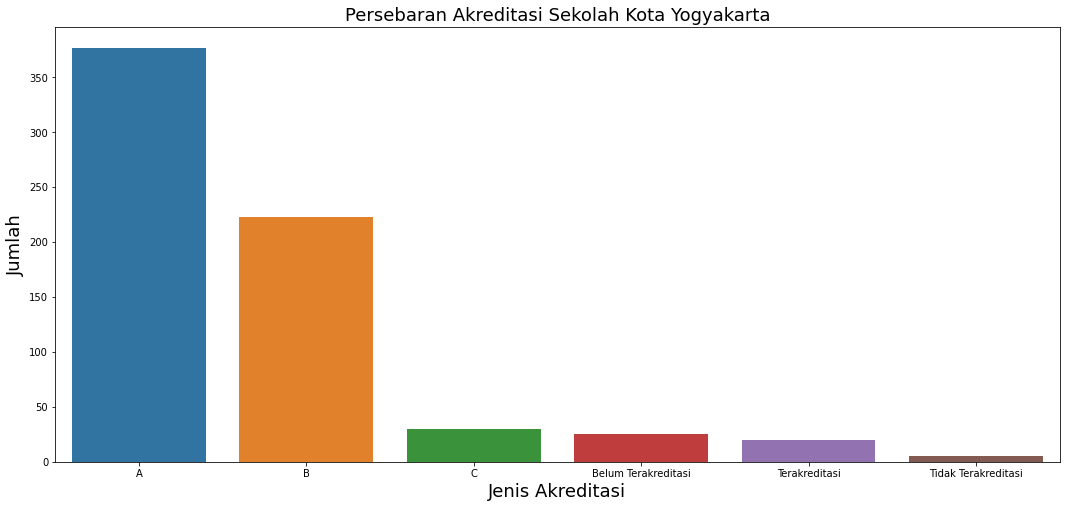

In [15]:
count = sekolah_kota_yogyakarta['akreditasi'].value_counts()

index = count.index 
values = count.values 

fig = plt.figure(figsize = (18,  8))
sns.barplot(data=sekolah_kota_yogyakarta, x=index, y=values)
plt.title("Persebaran Akreditasi Sekolah Kota Yogyakarta",fontsize=18)
plt.xlabel("Jenis Akreditasi", fontsize=18)
plt.ylabel("Jumlah",fontsize=18)

plt.show()

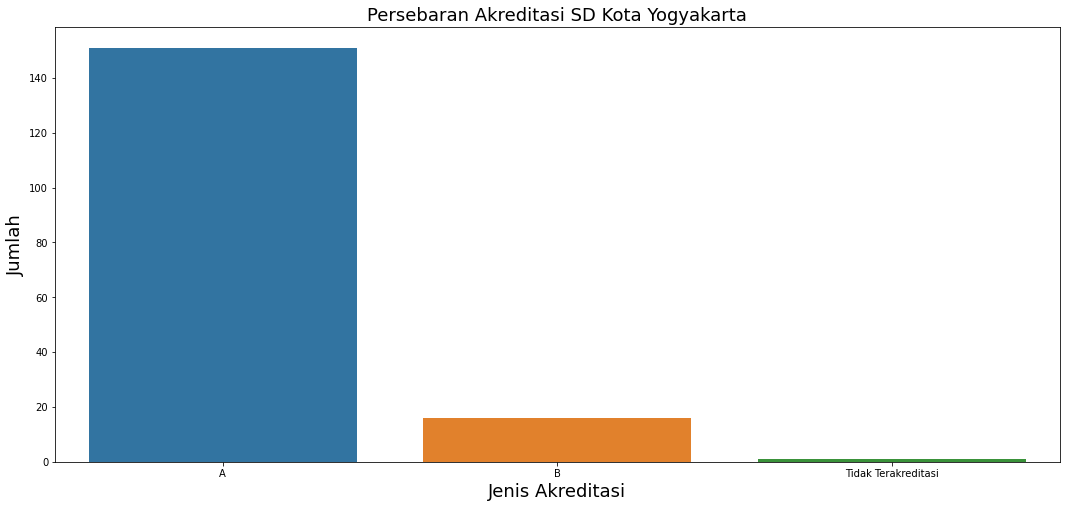

In [16]:
count = sd_kota_yogyakarta['akreditasi'].value_counts()

index = count.index 
values = count.values 

fig = plt.figure(figsize = (18,  8))
sns.barplot(data=sd_kota_yogyakarta, x=index, y=values)
plt.title("Persebaran Akreditasi SD Kota Yogyakarta",fontsize=18)
plt.xlabel("Jenis Akreditasi", fontsize=18)
plt.ylabel("Jumlah",fontsize=18)

plt.show()

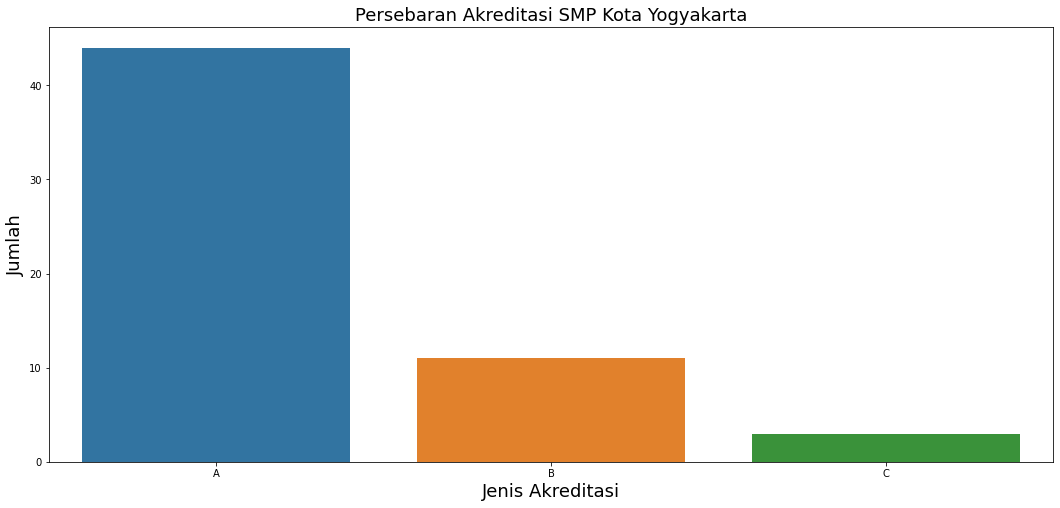

In [17]:
count = smp_kota_yogyakarta['akreditasi'].value_counts()

index = count.index 
values = count.values 

fig = plt.figure(figsize = (18,  8))
sns.barplot(data=smp_kota_yogyakarta, x=index, y=values)
plt.title("Persebaran Akreditasi SMP Kota Yogyakarta",fontsize=18)
plt.xlabel("Jenis Akreditasi", fontsize=18)
plt.ylabel("Jumlah",fontsize=18)

plt.show()

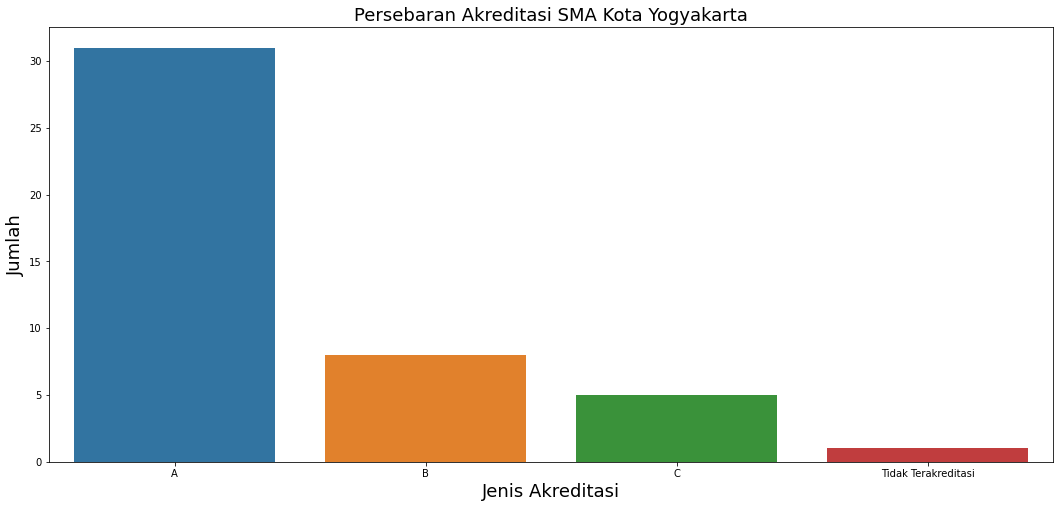

In [18]:
count = sma_kota_yogyakarta['akreditasi'].value_counts()

index = count.index 
values = count.values 

fig = plt.figure(figsize = (18,  8))
sns.barplot(data=sma_kota_yogyakarta, x=index, y=values)
plt.title("Persebaran Akreditasi SMA Kota Yogyakarta",fontsize=18)
plt.xlabel("Jenis Akreditasi", fontsize=18)
plt.ylabel("Jumlah",fontsize=18)

plt.show()

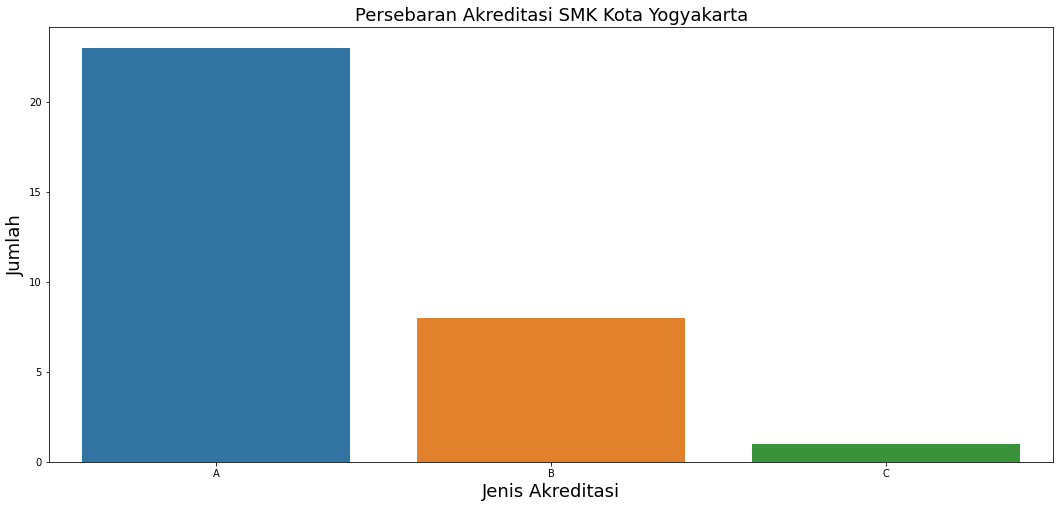

In [19]:
count = smk_kota_yogyakarta['akreditasi'].value_counts()

index = count.index 
values = count.values 

fig = plt.figure(figsize = (18,  8))
sns.barplot(data=smk_kota_yogyakarta, x=index, y=values)
plt.title("Persebaran Akreditasi SMK Kota Yogyakarta",fontsize=18)
plt.xlabel("Jenis Akreditasi", fontsize=18)
plt.ylabel("Jumlah",fontsize=18)

plt.show()

In [20]:
sma_kota_yogyakarta[sma_kota_yogyakarta['akreditasi'].str.contains('Tidak Terakreditasi', na=False)]

,sekolah_id,semester_id,nama,nama_nomenklatur,nss,npsn,bentuk_pendidikan_id,bentuk_pendidikan,alamat_jalan,rt,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
367761,1EEE7763-1552-4F89-961E-9471A363E6B2,20221,SMAS INSTITUT INDONESIA,NaN,302046002011,20403155,13,SMA,JL. MILIRAN NO. 15,13.0,...,NaN,NaN,NaN,Tidak Terakreditasi,2018-01-24 09:47:14.603,2013-10-25 20:22:00.000,1,NaN,NaN,NaN


In [21]:
sma_kota_yogyakarta[sma_kota_yogyakarta['akreditasi'].str.contains('C', na=False)]

,sekolah_id,semester_id,nama,nama_nomenklatur,nss,npsn,bentuk_pendidikan_id,bentuk_pendidikan,alamat_jalan,rt,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
388056,A4D883E3-533B-47E9-B0AF-13D3749FF99E,20221,SMAS GOTONG ROYONG,NaN,302046005050,20403154,13,SMA,JL. TOMPEYAN 156 YOGYAKARTA,3.0,...,92.0,Lainnya (Serat Optik),NaN,C,2018-01-24 09:47:14.603,2015-09-16 08:19:00.000,0,2022-08-12 22:09:03.900,2022-08-12 22:09:03.900,0.0
602020,9C77E53E-561F-441B-94C3-AFBBC763D9A1,20221,SMAS BOPKRI 3,NaN,302046008034,20404170,13,SMA,JL. KAPTEN P. TENDEAN 55 YK,39.0,...,NaN,NaN,NaN,C,2018-01-24 09:47:14.603,2018-11-06 15:37:28.530,1,NaN,NaN,NaN
631054,90DF09A1-C790-4A62-BDB3-A0A9AF03A46F,20221,SMAS PERAK,NaN,302046013057,20403140,13,SMA,JL. VETERAN WARUNGBOTO UH IV/970,1.0,...,11.0,Smartfren,NaN,C,2018-01-24 09:47:14.603,2020-08-27 13:32:23.687,0,2022-07-28 12:41:45.027,2022-07-28 12:41:45.027,0.0
633585,D6BAE6AC-4E94-4C07-8A98-77F0323971E7,20221,SMAS BUDI LUHUR,NaN,304046012437,20403152,13,SMA,KEPARAKAN KIDUL MG I / 1329,49.0,...,2.0,Telkom Speedy,NaN,C,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-07-29 00:04:05.780,2022-07-29 00:04:05.780,0.0
673850,E9781727-6F72-4441-8766-9592E5D33110,20221,SMAS SULTAN AGUNG,NaN,3232323,20403159,13,SMA,JL. BANTUL KM 3 YOGYAKARTA,14.0,...,2.0,Telkom Speedy,NaN,C,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-08-03 11:39:53.503,2022-08-03 11:39:53.503,0.0


In [22]:
smk_kota_yogyakarta[smk_kota_yogyakarta['akreditasi'].str.contains('C', na=False)]

,sekolah_id,semester_id,nama,nama_nomenklatur,nss,npsn,bentuk_pendidikan_id,bentuk_pendidikan,alamat_jalan,rt,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
78876,1741089E-3ECB-4D97-A001-00C38A1DBE37,20221,SMKS ISLAM YOGYAKARTA,NaN,324046009011,20403289,15,SMK,"JL. BANTUL, DUKUH MJ. I/1227",13.0,...,2.0,Telkom Speedy,NaN,C,2018-01-24 09:47:14.603,2022-03-10 11:08:09.470,0,2022-08-12 01:42:38.457,2022-08-12 01:42:38.457,0.0


In [23]:
smp_kota_yogyakarta[smp_kota_yogyakarta['akreditasi'].str.contains('C', na=False)]

,sekolah_id,semester_id,nama,nama_nomenklatur,nss,npsn,bentuk_pendidikan_id,bentuk_pendidikan,alamat_jalan,rt,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
447076,A0A3EC5C-2EF5-E011-B2B2-FF7EE3D6CDA4,20221,SMP BUDI LUHUR,NaN,202046012066,20403303,6,SMP,Keparakan Kidul Mg I / 1329 Yogyakarta,0.0,...,91.0,Lainnya (Kabel),NaN,C,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-26 20:46:16.007,2022-10-25 11:38:45.760,0.0
534872,80D1F05C-2EF5-E011-803B-8307F468A8CD,20221,SMP PERAK YOGYAKARTA,NaN,204046013090,20403231,6,SMP,Jl. Kemasan 46 Yogyakarta,38.0,...,99.0,Lainnya,NaN,C,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-23 13:13:36.530,2022-07-23 13:13:36.530,0.0
660537,18CAE4B2-C347-46F1-A2C2-5120BD8F5F40,20221,SMP IT AL KHAIRAAT,NaN,NaN,69964897,6,SMP,Jl.Veteran Gg.Madukoro Warungboto UH IV/ 768 C...,29.0,...,3.0,Telkom Astinet,NaN,C,2018-01-24 12:09:39.813,2022-03-10 11:08:09.470,0,2022-07-26 15:48:00.227,2022-07-26 15:48:00.227,0.0


In [24]:
sd_kota_yogyakarta[sd_kota_yogyakarta['akreditasi'].str.contains('Tidak Terakreditasi', na=False)]

,sekolah_id,semester_id,nama,nama_nomenklatur,nss,npsn,bentuk_pendidikan_id,bentuk_pendidikan,alamat_jalan,rt,...,akses_internet_2_id,akses_internet_2,blob_id,akreditasi,create_date_sekolah,last_update_sekolah,soft_delete_sekolah,create_date_longitudinal,last_update_longitudinal,soft_delete_longitudinal
311939,5009CB5C-2EF5-E011-9C62-DF44BF27AD79,20221,SD BHINNEKA TUNGGAL IKA,NaN,102046004026,20406565,5,SD,Jl. Kranggan no 11 A,0.0,...,NaN,NaN,NaN,Tidak Terakreditasi,2018-01-24 12:09:39.813,2013-09-08 00:00:00.000,0,NaN,NaN,NaN


In [ ]:
sdasd